In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline

In [3]:
df=pd.read_csv('clustering.csv')
df.shape

(381, 13)

In [9]:
df.head()
X=df[['LoanAmount','ApplicantIncome']]

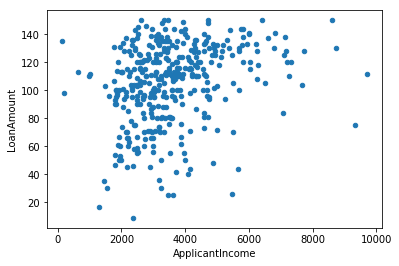

In [7]:
df.plot.scatter('ApplicantIncome','LoanAmount')


**Step 1**

*Chose the number of clusters(k) and select random centeroid for each cluster*

In [16]:
K=3

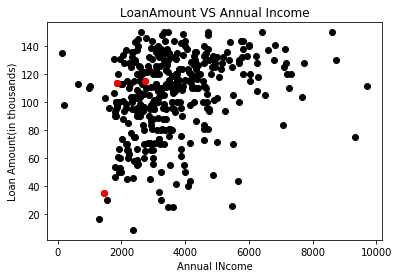

In [11]:
#Select random points as centeroids
Centeroids=(X.sample(n=k))
plt.scatter(X['ApplicantIncome'],X['LoanAmount'],c='black')
plt.scatter(Centeroids['ApplicantIncome'],Centeroids['LoanAmount'],c='red')
plt.xlabel('Annual INcome')
plt.ylabel('Loan Amount(in thousands)')
plt.title('LoanAmount VS Annual Income')
plt.show()
           


**Step 2**

*Assign all points to closest cluster centeroid*

**Step 3**

*Recompute centeroids of newly formed clusters*

**REPEAT STEP 2 AND 3**

In [12]:
diff=1
j=0

In [17]:
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centeroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+2] < min_dist:
                min_dist = row[i+2]
                pos=i+2
        C.append(pos)
    X["Cluster"]=C
    Centeroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centeroids_new['LoanAmount'] - Centeroids['LoanAmount']).sum() + (Centeroids_new['ApplicantIncome'] - Centeroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.0


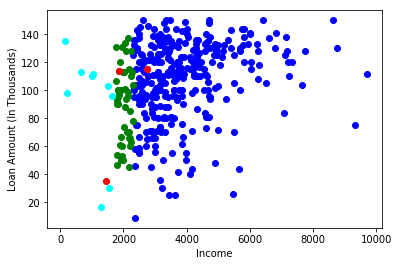

In [18]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centeroids["ApplicantIncome"],Centeroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

*So there we have our clusters with their respective centeroids*